In [1]:
# lasd the drive helper and mount
from google.colab import drive

# this will prompt for auth
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# after executing the cell above, drive
# files will be present in '/content/drive/My Drive'
!ls "/content/drive/My Drive"

In [3]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize, LabelBinarizer
from tensorflow import keras
from keras.preprocessing import image
from keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical





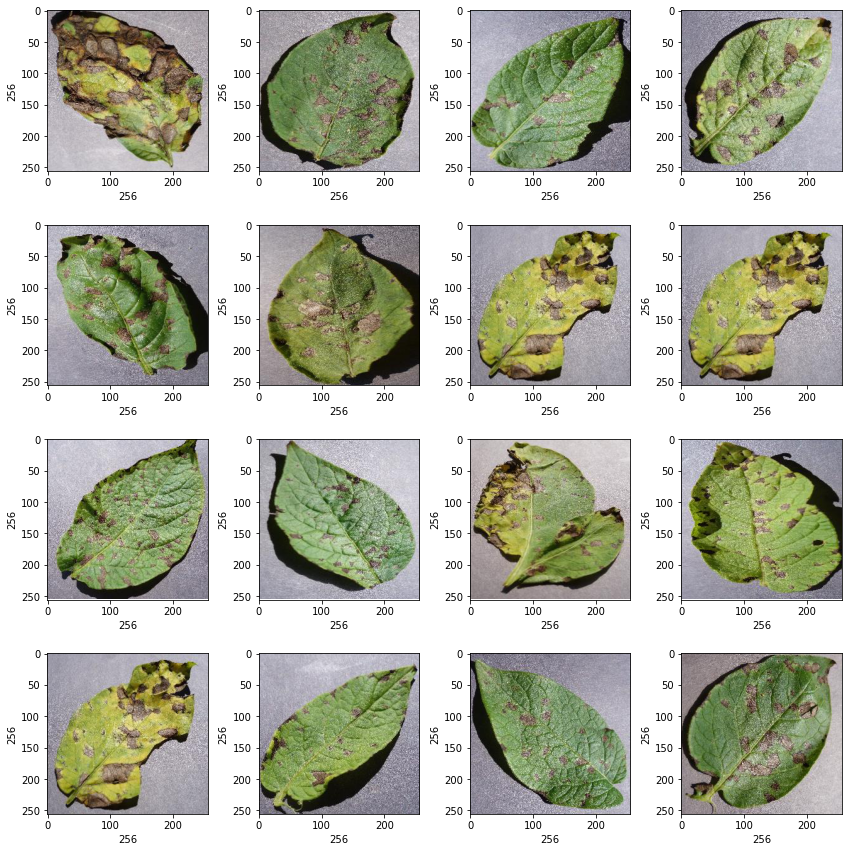

In [4]:
# ploting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "/content/drive/My Drive/Plant_images_meyada/Potato___Early_blight"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize=10) # width of image
  plt.ylabel(rand_img.shape[0], fontsize=10) # height of image

In [5]:
# Converting images to array 
def convert_image_to_array(image_dir):
  try:
    image = cv2.imread(image_dir)
    if image is not None:
      image = cv2.resize(image, (256,256))
      # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      return img_to_array(image)
    else:
      return np.array([])
  except Exception as e:
    print(f'Error: {e}')
    return None

In [6]:
dir = "/content/drive/My Drive/Plant_images_meyada"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [7]:
# visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    350
2    310
1    300
dtype: int64

In [8]:
image_list[0].shape

(256, 256, 3)

In [9]:
label_list = np.array(label_list)
label_list.shape

(960,)

In [10]:
# Checking the total number of the images which
#  is the length of the labels list.
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state=10)

In [11]:
# Next we will use sklearn train_test_split 
# to split the dataset into testing and 
# training data. Here I have taken test size as 0.2 
# so my data will be divided into 80% 
# training and 20% testing data.

x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)

In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(256, 256, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 42, 42, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 8)                 2

In [14]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

In [15]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [16]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (x_val, y_val))

Epoch 1/50
5/5 [==============================] - 6s 519ms/step - loss: 1.0505 - accuracy: 0.3241 - val_loss: 0.9421 - val_accuracy: 0.4740
Epoch 2/50
5/5 [==============================] - 1s 216ms/step - loss: 0.8759 - accuracy: 0.6319 - val_loss: 0.7887 - val_accuracy: 0.7273
Epoch 3/50
5/5 [==============================] - 1s 209ms/step - loss: 0.7276 - accuracy: 0.7932 - val_loss: 0.6505 - val_accuracy: 0.8636
Epoch 4/50
5/5 [==============================] - 1s 220ms/step - loss: 0.5898 - accuracy: 0.9088 - val_loss: 0.5060 - val_accuracy: 0.9286
Epoch 5/50
5/5 [==============================] - 1s 188ms/step - loss: 0.4497 - accuracy: 0.9300 - val_loss: 0.4017 - val_accuracy: 0.9481
Epoch 6/50
5/5 [==============================] - 1s 185ms/step - loss: 0.3560 - accuracy: 0.9251 - val_loss: 0.3250 - val_accuracy: 0.9545
Epoch 7/50
5/5 [==============================] - 1s 213ms/step - loss: 0.2897 - accuracy: 0.9446 - val_loss: 0.2670 - val_accuracy: 0.9545
Epoch 8/50
5/5 [====

In [17]:
model.save("/content/drive/My Drive/plant_disease.h5")
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('/content/drive/My Drive/plant_model.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
model.save_weights('/content/drive/My Drive/plant_model_weights.h5')

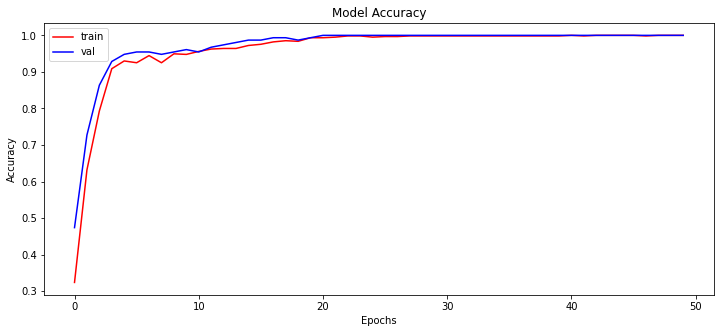

In [18]:
# plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [19]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 [==============================] - 0s 24ms/step - loss: 0.0403 - accuracy: 0.9948
Test Accuracy: 99.47916865348816


In [22]:
y_pred = model.predict(x_test)

6/6 [==============================] - 0s 25ms/step


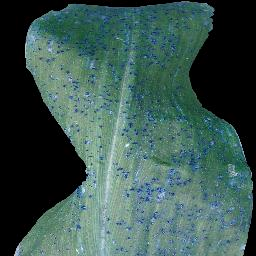

In [23]:
# Plotting image to compare
img = array_to_img(x_test[10])
img

In [24]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[10])])
print("Predicted : ",all_labels[np.argmax(y_pred[10])])

Originally :  Tomato-Bacterial_spot
Predicted :  Tomato-Bacterial_spot


## Conclusion

เราเริ่มต้นด้วยการโหลดชุดข้อมูลลงใน google colab โดยใช้ google ไดรฟ์และการแสดงภาพ การทำให้เป็นมาตรฐานเป็นขั้นตอนสำคัญเมื่อทำงานกับชุดข้อมูลทุกประเภท หลังจากนั้นเราได้สร้าง CNN Model ซึ่งใช้ในการทำนายโรคพืชต่อไปโดยใช้ภาพที่ได้ให้กับแบบจำลอง
โมเดลนี้มีประโยชน์อย่างมากเนื่องจากบริษัทการเกษตรและเกษตรกรต่างๆ สามารถใช้เพื่อเพิ่มผลผลิตและหยุดการสูญเสียพืชผลเนื่องจากโรค